In [48]:
#0.- Import libraries
#1.- load data
#2.- Understand the data: statistics(Describe()) info() shape
#3.- Pre processing data 
#3.1 - Visualitation data
#3.2 - Data inconsistency
#3.3 Cleaning data missing values
#4.- EDA
#5.- Feature engineering
#6.- Train test and model 

In [3]:
# Import libraries

In [262]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [263]:
df_train = pd.read_csv("train_load.csv")
df_test = pd.read_csv("test_load.csv")

# Understand the data

In [264]:
print("Shape in df_train:",df_train.shape)
print("Shape in df_test:",df_test.shape)

Shape in df_train: (614, 13)
Shape in df_test: (367, 12)


In [265]:
print("DATA TRAIN:")
print(df_train.describe())
print(" ")
print(" ")
print("Data test: ")
print(df_test.describe())

DATA TRAIN:
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  
 
 
Data test: 
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count

In [266]:
df_train.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
517,LP002682,Male,Yes,NaN,Not Graduate,No,3074,1800.0,123.0,360.0,0.0,Semiurban,N
103,LP001356,Male,Yes,0,Graduate,No,4652,3583.0,NaN,360.0,1.0,Semiurban,Y
195,LP001665,Male,Yes,1,Graduate,No,3125,2583.0,170.0,360.0,1.0,Semiurban,N
444,LP002424,Male,Yes,0,Graduate,No,7333,8333.0,175.0,300.0,NaN,Rural,Y
473,LP002522,Female,No,0,Graduate,Yes,2500,0.0,93.0,360.0,NaN,Urban,Y
132,LP001478,Male,No,0,Graduate,No,2718,0.0,70.0,360.0,1.0,Semiurban,Y
310,LP002002,Female,No,0,Graduate,No,2917,0.0,84.0,360.0,1.0,Semiurban,Y
89,LP001310,Male,Yes,0,Graduate,No,5695,4167.0,175.0,360.0,1.0,Semiurban,Y
92,LP001319,Male,Yes,2,Not Graduate,No,3273,1820.0,81.0,360.0,1.0,Urban,Y
439,LP002407,Female,Yes,0,Not Graduate,Yes,7142,0.0,138.0,360.0,1.0,Rural,Y


In [267]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Preprocessing data

3.1 Visualitation data

In [268]:
df_train['Married'].value_counts(),df_train['Loan_Status'].value_counts(),df_train['Dependents'].value_counts()

(Yes    398
 No     213
 Name: Married, dtype: int64,
 Y    422
 N    192
 Name: Loan_Status, dtype: int64,
 0     345
 1     102
 2     101
 3+     51
 Name: Dependents, dtype: int64)

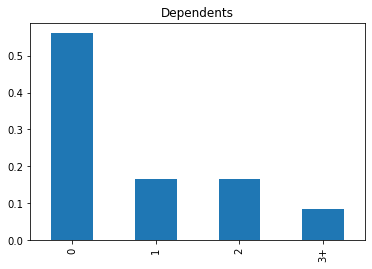

In [269]:
status_vals = pd.Series(df_train['Dependents'].value_counts()) #Provide a pandas series of the counts for each Professional status
(status_vals/df_train.shape[0]).plot(kind="bar");
plt.title("Dependents");

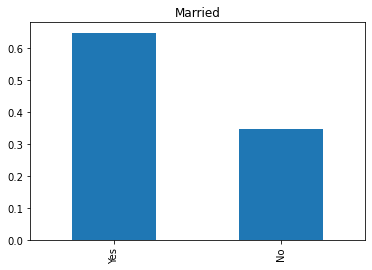

In [270]:
status_vals = pd.Series(df_train['Married'].value_counts()) #Provide a pandas series of the counts for each Professional status
(status_vals/df_train.shape[0]).plot(kind="bar");
plt.title("Married");

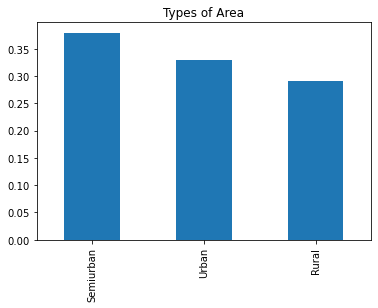

In [271]:
status_vals = pd.Series(df_train['Property_Area'].value_counts()) #Provide a pandas series of the counts for each Professional status


(status_vals/df_train.shape[0]).plot(kind="bar");
plt.title("Types of Area");

3.2 Data inconsistency

In [327]:
#replace 3+
df_train['Dependents'] = df_train['Dependents'].replace (['3+'], '3')

#replace space
df_train['Education'] = df_train['Education'].replace (['Not Graduate'], 'Not_Graduate')


KeyError: 'Education'

Cleaning data

                  Total   Percent
Credit_History       50  0.081433
Self_Employed        32  0.052117
LoanAmount           22  0.035831
Dependents           15  0.024430
Loan_Amount_Term     14  0.022801


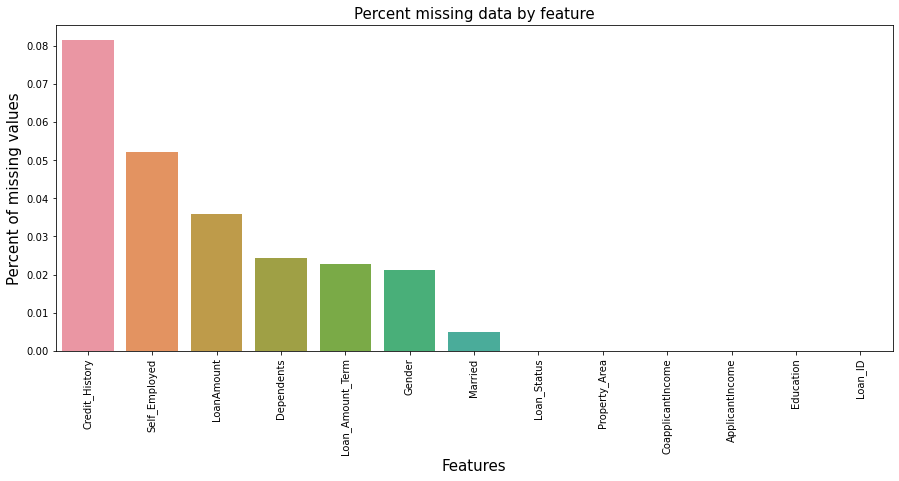

In [273]:
def distribution_of_missingValues(df_train):
    total = df_train.isnull().sum().sort_values(ascending=False)
    percent = (df_train.isnull().sum() / df_train.isnull().count()).sort_values(ascending = False)
    missingData = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
    f, ax = plt.subplots(figsize=(15, 6))
    plt.xticks(rotation='90')
    sns.barplot(x=missingData.index, y=missingData['Percent'])
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    
    return missingData.head()

print(distribution_of_missingValues(df_train))

In [274]:
#categorial data
df_train['Gender'].fillna(df_train['Gender'].mode()[0], inplace=True)
df_train['Married'].fillna(df_train['Married'].mode()[0], inplace=True)
df_train['Dependents'].fillna(df_train['Dependents'].mode()[0], inplace=True)
df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mode()[0], inplace=True)
df_train['Credit_History'].fillna(df_train['Credit_History'].mode()[0], inplace=True)
df_train['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0], inplace=True)

#Numerical data
df_train['LoanAmount'].fillna(df_train['LoanAmount'].mean(), inplace=True)

,Total,Percent
Loan_Status,0,0.0
Property_Area,0,0.0
Credit_History,0,0.0
Loan_Amount_Term,0,0.0
LoanAmount,0,0.0


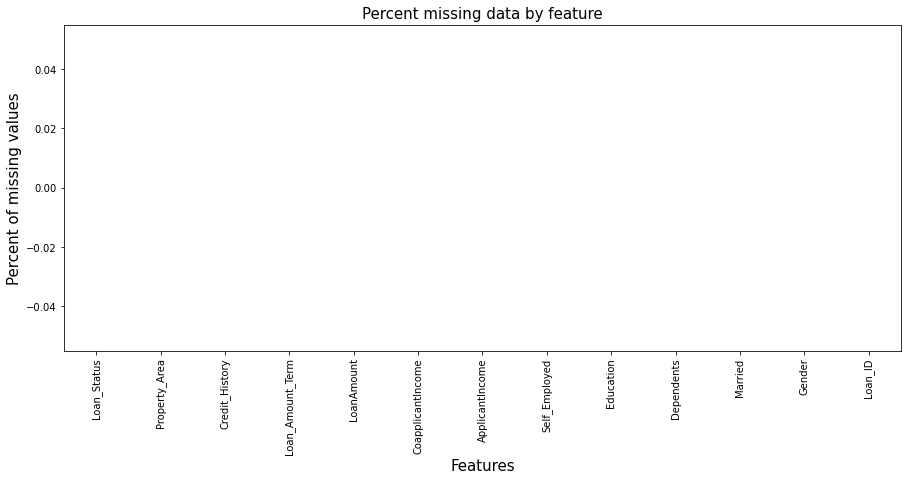

In [275]:
distribution_of_missingValues(df_train)

In [276]:
df_train["Loan_Status"] = df_train["Loan_Status"].map({"Y":1,"N":2})

In [277]:
df_train['LoanAmount_log']=np.log(df_train['LoanAmount'])
df_train['TotalIncome']= df_train['ApplicantIncome'] +df_train['CoapplicantIncome']
df_train['TotalIncome_log']=np.log(df_train['TotalIncome'])

,Total,Percent
TotalIncome_log,0,0.0
TotalIncome,0,0.0
LoanAmount_log,0,0.0
Loan_Status,0,0.0
Property_Area,0,0.0


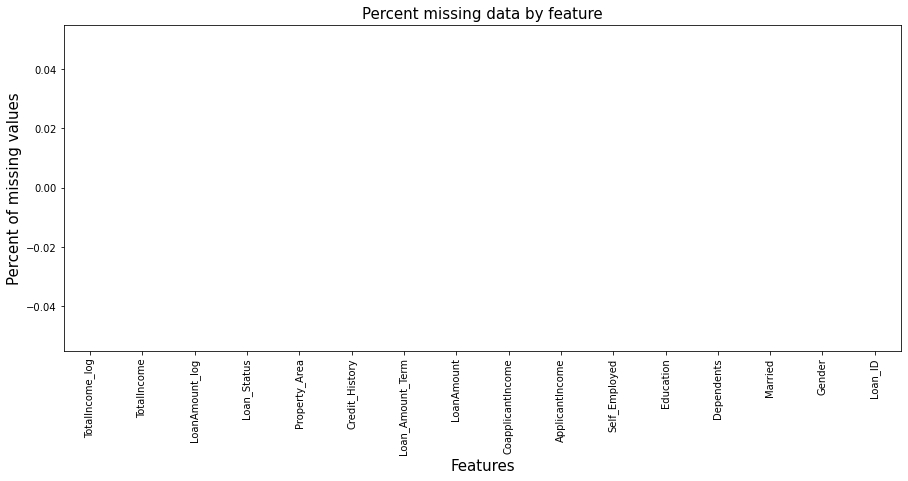

In [278]:
distribution_of_missingValues(df_train)

In [279]:
df_train = pd.get_dummies(df_train, columns=['Gender','Married','Education','Self_Employed','Property_Area'])

In [280]:
#Convert my data 
df_train = df_train.drop(['Loan_ID'],axis=1)
df_train = df_train.astype('float64')

In [281]:
df_train.dtypes

Dependents                 float64
ApplicantIncome            float64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Loan_Status                float64
LoanAmount_log             float64
TotalIncome                float64
TotalIncome_log            float64
Gender_Female              float64
Gender_Male                float64
Married_No                 float64
Married_Yes                float64
Education_Graduate         float64
Education_Not_Graduate     float64
Self_Employed_No           float64
Self_Employed_Yes          float64
Property_Area_Rural        float64
Property_Area_Semiurban    float64
Property_Area_Urban        float64
dtype: object

EDA

                    Total   Percent
TotalIncome_log  4.372136  0.208197
TotalIncome      4.287404  0.204162
LoanAmount       4.192677  0.199651
LoanAmount_log   3.961435  0.188640
ApplicantIncome  3.553481  0.169213


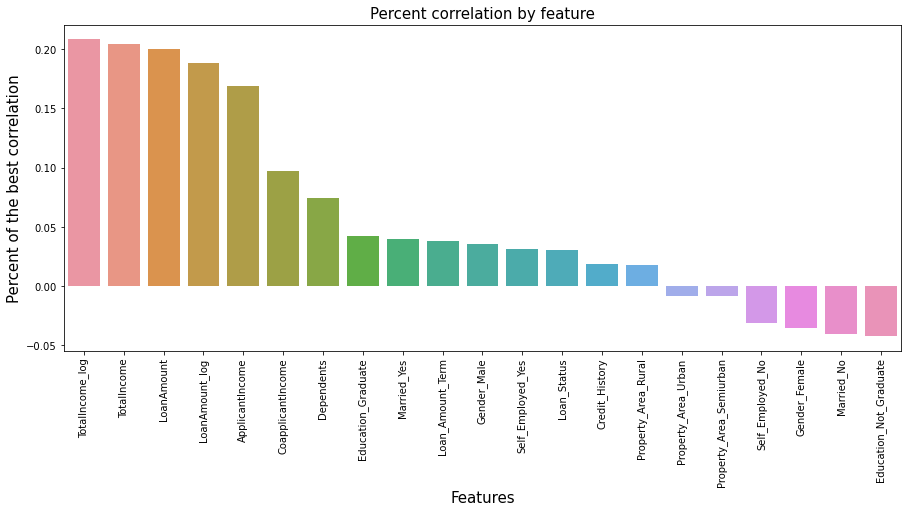

In [282]:
def corr(df_train):
    total = df_train.corr().sum().sort_values(ascending=False)
    percent = (df_train.corr().sum() / df_train.corr().count()).sort_values(ascending = False)
    missingData = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
    f, ax = plt.subplots(figsize=(15, 6))
    plt.xticks(rotation='90')
    sns.barplot(x=missingData.index, y=missingData['Percent'])
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of the best correlation', fontsize=15)
    plt.title('Percent correlation by feature', fontsize=15)
    
    return missingData.head()

print(corr(df_train))

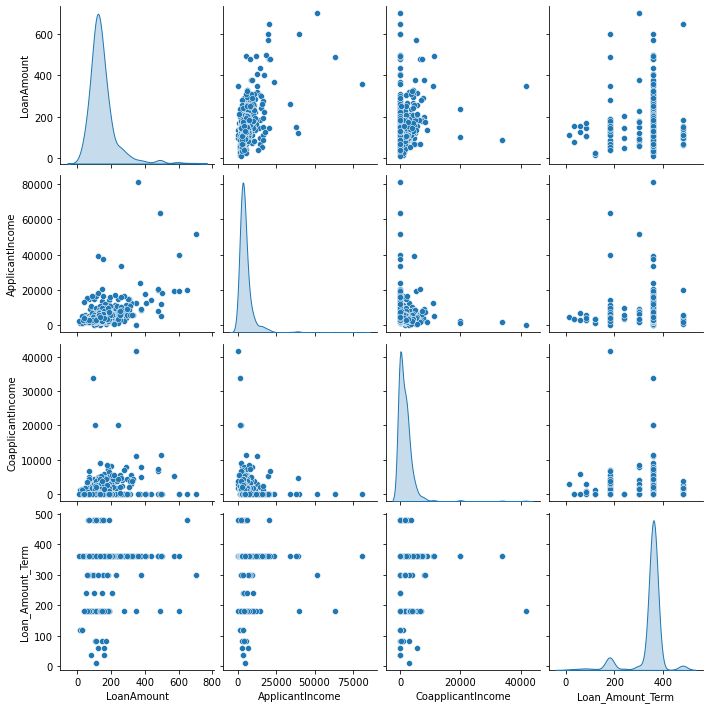

In [283]:
sns.pairplot(df_train[["LoanAmount", "ApplicantIncome", "CoapplicantIncome", "Loan_Amount_Term"]], diag_kind="kde")

<AxesSubplot:>

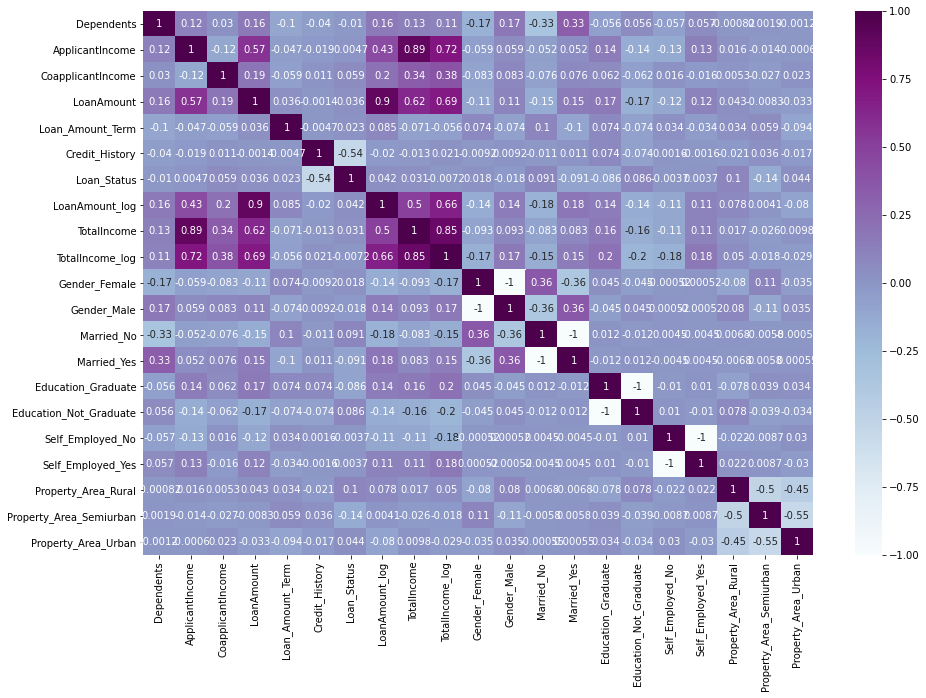

In [284]:
corr = df_train.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,cmap="BuPu")

In [285]:
df = df_train.drop(['Loan_Status'], axis=1)
df1 = df_train['Loan_Status']

# Feature egineering

In [329]:
from sklearn.feature_selection import chi2 
from sklearn.feature_selection import SelectKBest

bestfeatures = SelectKBest(score_func=chi2, k=6)
fit = bestfeatures.fit(df,df1)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(df.columns)

featurescores = pd.concat([dfcolumns, dfscores], axis=1)
featurescores.columns = ['Columns', 'Score']

featurescores
featurescores.sort_values('Score',ascending=False)

,Columns,Score
2,CoapplicantIncome,11342.041603
7,TotalIncome,3559.550362
1,ApplicantIncome,93.904964
3,LoanAmount,39.211545
5,Credit_History,26.005877
18,Property_Area_Semiurban,7.103093
17,Property_Area_Rural,4.410584
4,Loan_Amount_Term,3.778554
14,Education_Not_Graduate,3.540502
11,Married_No,3.355645


# Train test split and model

In [330]:
X = df_train.drop(['Loan_Status'], axis=1).values
y = df_train['Loan_Status'].values

In [331]:
X_train, X_test, y_train, y_test = train_test_split(X ,y , test_size = 0.2, random_state = 0)

In [332]:
from sklearn.model_selection import cross_val_score
def clas(model,X,y):
    
    X_train, X_test, y_train, y_test = train_test_split(X ,y , test_size = 0.2, random_state = 0)
    model.fit(X_train,y_train)
    print('Accuracy: ', model.score(X_test,y_test)*100)
    score = cross_val_score(model,X,y,cv=5)
    y_pred = model.predict(X_test)
    print("Cross validation: ",np.mean(score)*100)
    print('Predict test data:',y_pred)

In [338]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
clas(model,X,y)

print(" ",y_test)

Accuracy:  82.11382113821138
Cross validation:  78.49926695988272
Predict test data: [1. 1. 1. 1. 1. 2. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 1. 1. 1.
 1. 1. 1. 1. 2. 2. 1. 2. 1. 1. 1. 2. 1. 2. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 2. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 2.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 2. 2. 1. 1. 1. 1.
 1. 2. 1.]
  [1. 2. 1. 2. 1. 2. 1. 1. 2. 1. 1. 1. 1. 1. 1. 2. 2. 1. 1. 2. 2. 1. 1. 1.
 1. 1. 1. 1. 2. 2. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1.
 2. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 2. 1. 2. 1. 1. 1. 1. 1. 1. 2. 1.
 1. 1. 1. 1. 2. 2. 1. 2. 1. 2. 2. 1. 2. 1. 1. 1. 1. 1. 1. 2. 2. 2. 1. 2.
 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 2. 1. 2. 2. 1. 2. 1. 1. 1. 1. 1.
 1. 2. 1.]


In [334]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
clas(model, X,y)

Accuracy:  71.54471544715447
Cross validation:  71.83393309342931
Predict test data: [1. 1. 2. 1. 1. 1. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 2. 1. 2. 2. 2. 1. 1. 1.
 1. 1. 2. 1. 2. 2. 1. 1. 1. 2. 2. 2. 1. 1. 1. 1. 1. 2. 2. 1. 1. 1. 1. 1.
 2. 1. 1. 2. 1. 1. 2. 2. 1. 1. 1. 1. 2. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 2. 2. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 2. 2. 1. 2.
 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 2. 1. 1. 2. 2. 1. 1. 2. 1.
 2. 2. 1.]


In [335]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
clas(model,X,y)

Accuracy:  78.86178861788618
Cross validation:  78.82980141276823
Predict test data: [1. 1. 1. 1. 1. 2. 1. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 1. 1. 1.
 1. 1. 1. 1. 2. 2. 1. 2. 1. 1. 1. 2. 1. 1. 1. 1. 1. 2. 2. 1. 1. 2. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 2. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 2. 1. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 2.
 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 2. 2. 1. 1. 1. 1.
 1. 2. 1.]


In [336]:
model = ExtraTreesClassifier()
clas(model,X,y)

Accuracy:  78.04878048780488
Cross validation:  75.73104091696655
Predict test data: [1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 1. 1. 1.
 2. 1. 1. 1. 2. 2. 1. 2. 1. 2. 1. 2. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 2. 1. 2. 1. 1. 2. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 2.
 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 1. 1. 1. 1.
 1. 2. 1.]
